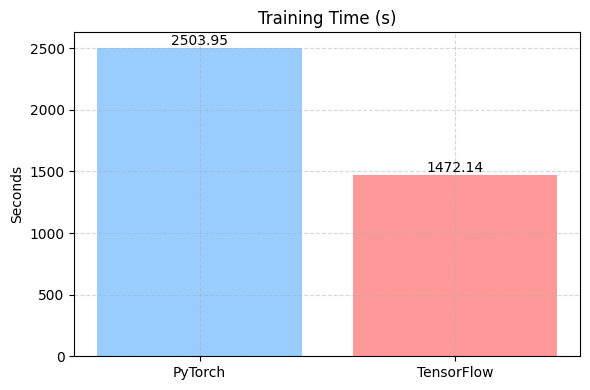

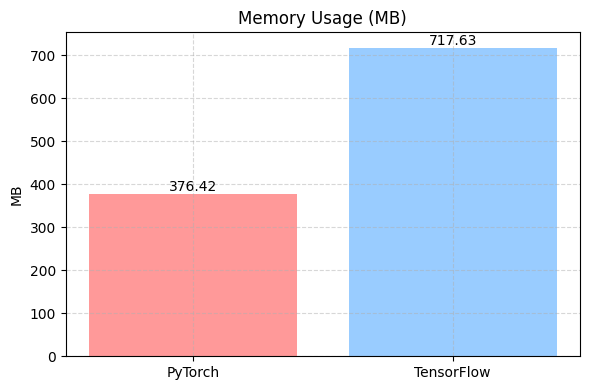

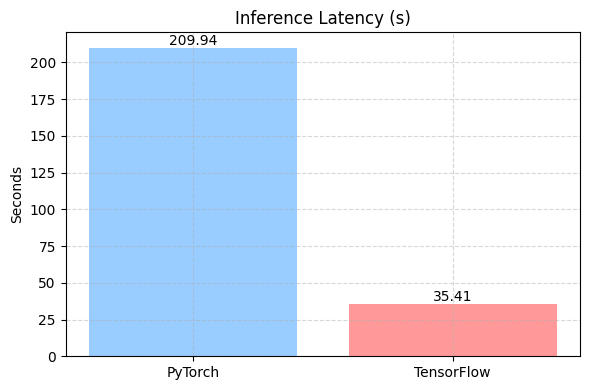

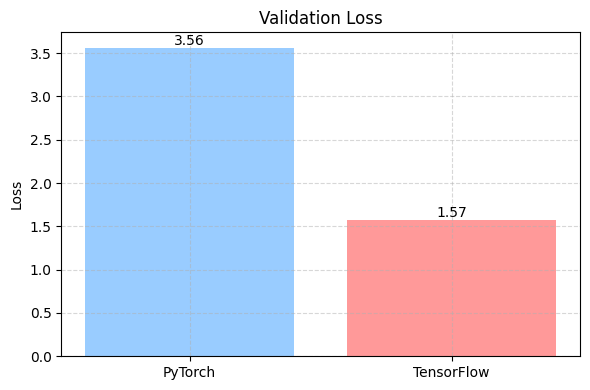

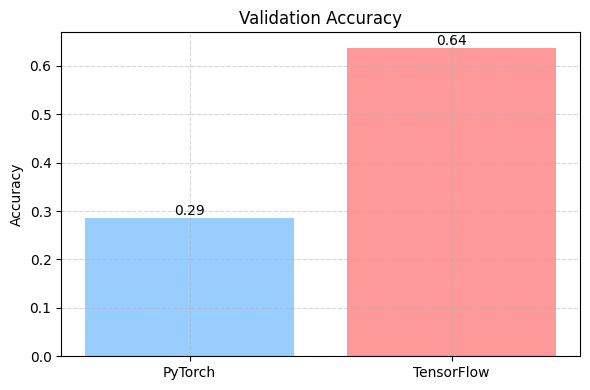

In [ ]:
import json
import matplotlib.pyplot as plt
import os

# === 设置路径 ===
pt_metrics_path = "experiments/PyTorch_resnet50_bs32_lr0.001_e10/metrics.json"
tf_metrics_path = "experiments/TF_resnet50_bs32_lr0.001_e10/metrics.json"

# === 读取指标 ===
with open(pt_metrics_path, "r") as f:
    pt_metrics = json.load(f)

with open(tf_metrics_path, "r") as f:
    tf_metrics = json.load(f)

# === 构建对比数据 ===
frameworks = ["PyTorch", "TensorFlow"]
training_time = [pt_metrics["training_time_seconds"], tf_metrics["training_time_seconds"]]
memory_usage = [pt_metrics["memory_usage_mb"], tf_metrics["memory_usage_mb"]]
inference_latency = [pt_metrics["inference_latency_seconds"], tf_metrics["inference_latency_seconds"]]
accuracy = [pt_metrics["val_accuracy"], tf_metrics["val_accuracy"]]
val_loss = [pt_metrics["val_loss"], tf_metrics["val_loss"]]

# === 择优 ===
def plot_bar(metric, values, ylabel, higher_is_better=False):
    plt.figure(figsize=(6, 4))

    if higher_is_better:
        best_idx = values.index(max(values))
    else:
        best_idx = values.index(min(values))

    colors = ['#99ccff'] * len(values)
    colors[best_idx] = '#ff9999' 

    bars = plt.bar(frameworks, values, color=colors)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')
    
    plt.title(metric)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# === 绘图 ===
plot_bar("Training Time (s)", training_time, "Seconds")
plot_bar("Memory Usage (MB)", memory_usage, "MB")
plot_bar("Inference Latency (s)", inference_latency, "Seconds")
plot_bar("Validation Loss", val_loss, "Loss")
plot_bar("Validation Accuracy", accuracy, "Accuracy", higher_is_better=True)
